<a href="https://colab.research.google.com/github/kazarezova/bioinformatics_for_NGS_riboseq/blob/main/kazarezova_ngs_riboseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение дифференциальной экспрессии

# 1.1
Для каждого гена найдите коэффициент корреляции числа
каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы
выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не
нормированные на глубину библиотеки каунты, учтите это при анализе.

In [1]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t'))

df.set_index('geneSymbol', inplace=True)
df_raw = df # сохраним таблицу

df.head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,...,218,457,0,0,200,889,0,0,161,857.0
TNMD,ENSG00000000005.5,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,NaN
DPM1,ENSG00000000419.12,168,239,88,187,114,439,66,201,325,...,92,170,109,357,60,244,141,173,56,83.0
SCYL3,ENSG00000000457.13,65,121,60,106,36,163,70,156,130,...,127,176,67,176,55,261,64,100,68,176.0
C1orf112,ENSG00000000460.16,8,43,18,70,16,76,4,63,44,...,124,437,7,167,34,201,6,61,9,58.0


### Стандартизация Z-score

In [3]:
columns = list(df.columns.values)
for column in columns[1:]:
  df[column] =( df[column] - df[column].mean() ) / df[column].std()

df.head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.14,-0.033471,-0.067193,0.042873,0.217903,-0.039859,-0.088464,0.042670,0.646472,-0.043639,...,-0.019821,0.085435,-0.034014,-0.056385,-0.008502,0.161883,-0.028739,-0.063334,-0.004833,0.113110
TNMD,ENSG00000000005.5,-0.033471,-0.067193,-0.059844,-0.090153,-0.039859,-0.088464,-0.081622,-0.143131,-0.043639,...,-0.146717,-0.125700,-0.033881,-0.056385,-0.074723,-0.092652,-0.028739,-0.063334,-0.064690,NaN
DPM1,ENSG00000000419.12,-0.014495,0.004272,-0.037358,-0.024444,-0.021822,-0.006069,-0.054369,-0.046009,-0.022033,...,-0.093165,-0.047159,-0.019612,-0.001214,-0.054856,-0.022791,-0.013828,-0.024239,-0.043870,-0.059785
SCYL3,ENSG00000000457.13,-0.026129,-0.031012,-0.044513,-0.053059,-0.034163,-0.057871,-0.052717,-0.067861,-0.034997,...,-0.072791,-0.044387,-0.025161,-0.029186,-0.056512,-0.017924,-0.021971,-0.040736,-0.039409,-0.039011
C1orf112,ENSG00000000460.16,-0.032567,-0.054335,-0.055244,-0.065777,-0.037327,-0.074200,-0.079971,-0.113023,-0.040714,...,-0.074538,0.076195,-0.033089,-0.030577,-0.063465,-0.035103,-0.028104,-0.049549,-0.061344,-0.065370


### Корреляция Спирмена между RNA-Seq и Ribo-Seq для генов

In [4]:
import scipy
from scipy import stats

rows = list(df.index.values)

corr_normal={}
corr_tumor={}

for row in rows:

  normal_RPF=[]
  tumor_RPF=[]
  normal_RNA=[]
  tumor_RNA=[]

  for column in columns[1::4]:
    normal_RPF.append(df.loc[row,column])
  for column in columns[2::4]:
    tumor_RPF.append(df.loc[row,column])
  for column in columns[3::4]:
    normal_RNA.append(df.loc[row,column])
  for column in columns[4::4]:
    tumor_RNA.append(df.loc[row,column])

  rho, p = scipy.stats.spearmanr(normal_RPF, normal_RNA, nan_policy='omit')
  try:
    corr_normal[row]=float(rho)
  except TypeError:
    corr_normal[row]=0

  rho, p = scipy.stats.spearmanr(tumor_RPF, tumor_RNA, nan_policy='omit')
  try:
    corr_tumor[row]=float(rho)
  except TypeError:
    corr_tumor[row]=0

df_corr_normal = pd.DataFrame.from_dict(corr_normal.items())
df_corr_normal.rename(columns={0: "gene", 1: "corr_normal"}, inplace=True)
df_corr_normal.sort_values('gene', inplace=True)
df_corr_normal.set_index('gene', inplace=True)

df_corr_tumor = pd.DataFrame.from_dict(corr_tumor.items())
df_corr_tumor.rename(columns={0: "gene", 1: "corr_tumor"}, inplace=True)
df_corr_tumor.sort_values('gene', inplace=True)
df_corr_tumor.set_index('gene', inplace=True)

df_corr = pd.concat([df_corr_normal, df_corr_tumor], axis=1)
df_corr.head()

,corr_normal,corr_tumor
gene,,
A1BG,0.587879,0.830303
A1CF,0.406061,0.345455
A2M,0.939394,0.478788
A2ML1,0.672727,0.636364
A3GALT2,0.672727,0.533333


# 1.2
Постройте гистограмму распределения этих
коэффициентов корреляции. Для каких генов корреляция самая высокая, а
для каких — самая низкая? Как вы можете это объяснить?

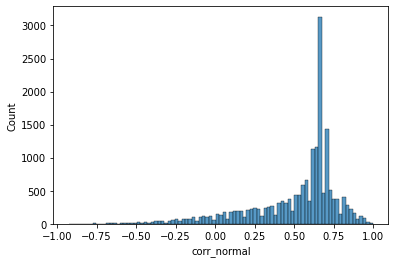

In [5]:
import seaborn as sns

sns.histplot(data=df_corr, x="corr_normal")

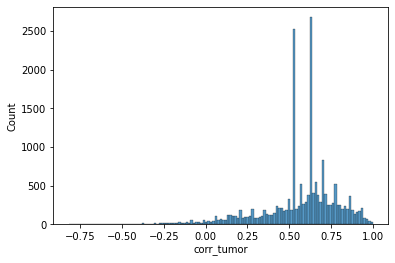

In [6]:
sns.histplot(data=df_corr, x="corr_tumor")

In [7]:
df_corr['corr_normal_abs']=abs(df_corr['corr_normal'])
df_corr['corr_tumor_abs']=abs(df_corr['corr_tumor'])

In [8]:
df_corr.sort_values('corr_normal_abs', ascending=False).head()

,corr_normal,corr_tumor,corr_normal_abs,corr_tumor_abs
gene,,,,
KRT7,1.000000,0.733333,1.000000,0.733333
ENO3,0.987879,0.866667,0.987879,0.866667
NEO1,0.987879,0.793939,0.987879,0.793939
ZSCAN25,0.987879,0.515152,0.987879,0.515152
SRGN,0.987879,0.878788,0.987879,0.878788


In [9]:
df_corr.sort_values('corr_tumor_abs', ascending=False).head()

,corr_normal,corr_tumor,corr_normal_abs,corr_tumor_abs
gene,,,,
SEZ6L2,0.684848,1.000000,0.684848,1.000000
PRG4,0.915152,1.000000,0.915152,1.000000
ACTA2,0.890909,1.000000,0.890909,1.000000
ACSL5,0.781818,1.000000,0.781818,1.000000
LBP,0.733333,0.987879,0.733333,0.987879


In [10]:
df_corr.sort_values('corr_normal_abs').head()

,corr_normal,corr_tumor,corr_normal_abs,corr_tumor_abs
gene,,,,
AKR1C3,0.0,0.0,0.0,0.0
TMEM256-PLSCR3,0.0,0.0,0.0,0.0
SERPINA3,0.0,0.0,0.0,0.0
TBC1D26,0.0,0.0,0.0,0.0
ATRIP,0.0,0.0,0.0,0.0


In [11]:
df_corr.sort_values('corr_tumor_abs').head()

,corr_normal,corr_tumor,corr_normal_abs,corr_tumor_abs
gene,,,,
ATRIP,0.0,0.0,0.0,0.0
CCDC7,0.0,0.0,0.0,0.0
TBC1D26,0.0,0.0,0.0,0.0
MATR3,0.0,0.0,0.0,0.0
PRICKLE4,0.0,0.0,0.0,0.0


Самая высокая корреляция получилась у генов таких белков как кератин (KRT7), актин А2 (ACTA2), а самая низкая - у генов ATRIP, SERPINA3, PRICKLE4 и др. Высокая корреляция значений транскрипции и трансляции - это высокая эффективность трансляции. Посмотрим, может быть, эффективность связана с интенсивностью экспрессии?

In [19]:
df['sum_RPF_normal'] = df.iloc[:, 1::4].sum(axis=1)
df['sum_RPF_tumor'] = df.iloc[:, 2::4].sum(axis=1)
df['sum_RNA_normal'] = df.iloc[:, 3::4].sum(axis=1)
df['sum_RNA_tumor'] = df.iloc[:, 4::4].sum(axis=1)

df.sort_values('sum_RPF_normal', ascending=False).head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum_RPF_normal,sum_RPF_tumor,sum_RNA_normal,sum_RNA_tumor
geneSymbol,,,,,,,,,,,,,,,,,,,,,
ALB,ENSG00000163631.16,129.220003,45.604295,126.043198,65.981947,124.876761,3.568825,121.631319,6.708836,109.575158,...,112.606231,79.200491,132.272668,92.399598,123.338752,34.407254,4937.645514,2041.047887,4480.665816,1752.857813
APOB,ENSG00000084674.13,22.805579,90.370958,24.303001,64.324730,19.520567,79.412432,19.606562,82.657380,23.361039,...,20.528610,70.453799,18.112595,44.750326,17.676228,20.261603,997.143395,2734.460547,908.834228,2007.486760
FGA,ENSG00000171560.14,11.905190,4.810365,11.129414,2.036567,17.971655,25.579000,14.777735,21.587463,41.447424,...,13.909492,2.447837,12.198271,21.106588,11.993840,6.719968,834.891577,732.899833,722.068193,461.311637
SERPINA1,ENSG00000197249.12,13.535793,32.158418,17.363980,43.281861,23.521315,17.388670,19.263002,16.206896,35.279201,...,19.875340,27.577002,10.674614,54.566498,17.420810,22.857705,766.991381,1062.065409,1009.239638,887.659714
C3,ENSG00000125730.16,15.996832,10.700991,19.547611,5.157405,20.301193,4.169426,20.199532,4.272527,20.022547,...,24.326714,15.301742,9.587496,13.618248,20.019227,7.413110,677.033643,590.118948,1080.771313,551.333518


In [20]:
df.sort_values('sum_RPF_tumor', ascending=False).head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum_RPF_normal,sum_RPF_tumor,sum_RNA_normal,sum_RNA_tumor
geneSymbol,,,,,,,,,,,,,,,,,,,,,
APOB,ENSG00000084674.13,22.805579,90.370958,24.303001,64.324730,19.520567,79.412432,19.606562,82.657380,23.361039,...,20.528610,70.453799,18.112595,44.750326,17.676228,20.261603,997.143395,2734.460547,908.834228,2007.486760
ALB,ENSG00000163631.16,129.220003,45.604295,126.043198,65.981947,124.876761,3.568825,121.631319,6.708836,109.575158,...,112.606231,79.200491,132.272668,92.399598,123.338752,34.407254,4937.645514,2041.047887,4480.665816,1752.857813
FN1,ENSG00000115414.18,7.800107,8.308261,6.502293,3.785988,10.363162,20.614464,8.271992,17.875454,6.755134,...,8.642276,10.661979,6.439084,18.715932,6.932707,7.334258,381.271329,1203.309728,371.602393,703.631375
SERPINA1,ENSG00000197249.12,13.535793,32.158418,17.363980,43.281861,23.521315,17.388670,19.263002,16.206896,35.279201,...,19.875340,27.577002,10.674614,54.566498,17.420810,22.857705,766.991381,1062.065409,1009.239638,887.659714
APOA2,ENSG00000158874.11,3.124833,69.399433,4.392250,29.074878,3.864854,55.009234,4.552713,50.945544,2.565914,...,4.133952,15.894704,1.792184,7.486247,3.141970,4.891170,103.426198,946.731801,157.937141,754.909705


In [21]:
df.sort_values('sum_RNA_normal', ascending=False).head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum_RPF_normal,sum_RPF_tumor,sum_RNA_normal,sum_RNA_tumor
geneSymbol,,,,,,,,,,,,,,,,,,,,,
ALB,ENSG00000163631.16,129.220003,45.604295,126.043198,65.981947,124.876761,3.568825,121.631319,6.708836,109.575158,...,112.606231,79.200491,132.272668,92.399598,123.338752,34.407254,4937.645514,2041.047887,4480.665816,1752.857813
DPP9,ENSG00000142002.16,-0.020255,-0.010679,2.323600,0.445060,-0.019291,-0.048674,23.304781,0.583828,-0.021834,...,52.372623,3.088900,-0.019856,-0.034860,32.396379,3.461549,-0.892088,-0.754183,1101.604067,354.778660
C3,ENSG00000125730.16,15.996832,10.700991,19.547611,5.157405,20.301193,4.169426,20.199532,4.272527,20.022547,...,24.326714,15.301742,9.587496,13.618248,20.019227,7.413110,677.033643,590.118948,1080.771313,551.333518
SERPINA1,ENSG00000197249.12,13.535793,32.158418,17.363980,43.281861,23.521315,17.388670,19.263002,16.206896,35.279201,...,19.875340,27.577002,10.674614,54.566498,17.420810,22.857705,766.991381,1062.065409,1009.239638,887.659714
APOB,ENSG00000084674.13,22.805579,90.370958,24.303001,64.324730,19.520567,79.412432,19.606562,82.657380,23.361039,...,20.528610,70.453799,18.112595,44.750326,17.676228,20.261603,997.143395,2734.460547,908.834228,2007.486760


In [22]:
df.sort_values('sum_RNA_tumor', ascending=False).head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum_RPF_normal,sum_RPF_tumor,sum_RNA_normal,sum_RNA_tumor
geneSymbol,,,,,,,,,,,,,,,,,,,,,
APOB,ENSG00000084674.13,22.805579,90.370958,24.303001,64.324730,19.520567,79.412432,19.606562,82.657380,23.361039,...,20.528610,70.453799,18.112595,44.750326,17.676228,20.261603,997.143395,2734.460547,908.834228,2007.486760
ALB,ENSG00000163631.16,129.220003,45.604295,126.043198,65.981947,124.876761,3.568825,121.631319,6.708836,109.575158,...,112.606231,79.200491,132.272668,92.399598,123.338752,34.407254,4937.645514,2041.047887,4480.665816,1752.857813
IGF2,ENSG00000167244.18,0.101622,1.325925,2.163648,24.345929,0.062031,-0.080394,2.125499,-0.131962,0.089385,...,9.007153,71.156421,0.044547,0.827258,7.216009,112.402222,2.944982,12.263210,212.772503,937.817610
SERPINA1,ENSG00000197249.12,13.535793,32.158418,17.363980,43.281861,23.521315,17.388670,19.263002,16.206896,35.279201,...,19.875340,27.577002,10.674614,54.566498,17.420810,22.857705,766.991381,1062.065409,1009.239638,887.659714
APOA2,ENSG00000158874.11,3.124833,69.399433,4.392250,29.074878,3.864854,55.009234,4.552713,50.945544,2.565914,...,4.133952,15.894704,1.792184,7.486247,3.141970,4.891170,103.426198,946.731801,157.937141,754.909705


Транскрипция и трансляция наиболее интенсивны и в норме, и в опухоле у примерно одних и тех же генов (APOB, ALB, SERPINA1), и это не те гены, которые имеет наиболее высокую корреляцию. У самых высококоррелированных генов интенсивность обоих процессов оказалась далекой от максимальной:

In [28]:
df.loc[['ACTA2', 'KRT7'], :]

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum_RPF_normal,sum_RPF_tumor,sum_RNA_normal,sum_RNA_tumor
geneSymbol,,,,,,,,,,,,,,,,,,,,,
ACTA2,ENSG00000107796.12,-0.023644,-0.000811,-0.024838,-0.049880,0.043678,0.008195,0.010461,-0.020271,-0.020438,...,-0.009164,0.029032,-0.016577,0.212589,-0.028627,0.061509,0.849866,25.093822,1.300302,6.372233
KRT7,ENSG00000135480.14,-0.026807,-0.064203,-0.047068,-0.090506,0.026749,-0.088089,0.025327,-0.143131,-0.034531,...,-0.039625,-0.088930,-0.023345,-0.063108,-0.039409,-0.077209,-0.523339,-2.205061,-0.752154,-3.078478


# 1.3
Проанализируйте распределение каунтов Ribo-seq:
постройте зависимость дисперсии от среднего. Похоже ли это на
NB-распределение? Если нет, то на какое похоже? Если да, то какие
статистические тесты можно использовать для подтверждения того, что перед
вами NB-распределение?


In [29]:
df = df_raw

for column in columns:
  if 'RNA' in column:
    df.drop(column, axis=1, inplace=True)

In [30]:
df['mean']=df.mean(axis=1, numeric_only=True)
df['var']=df.var(axis=1, numeric_only=True)

df.head()

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,...,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF,sum_RPF_normal,sum_RPF_tumor,sum_RNA_normal,sum_RNA_tumor,mean,var
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.14,-0.033471,-0.067193,-0.039859,-0.088464,-0.043639,-0.141701,-0.036151,-0.072160,-0.038871,...,-0.034014,-0.056385,-0.028739,-0.063334,-1.485154,-3.347795,-0.041042,5.087327,-0.041454,1.639338
TNMD,ENSG00000000005.5,-0.033471,-0.067193,-0.039859,-0.088464,-0.043639,-0.141701,-0.036151,-0.072160,-0.038871,...,-0.033881,-0.056385,-0.028739,-0.063334,-1.484626,-3.346589,-3.389138,-5.163847,-0.608000,1.782196
DPM1,ENSG00000000419.12,-0.014495,0.004272,-0.021822,-0.006069,-0.022033,-0.049422,-0.022019,-0.019514,-0.029503,...,-0.019612,-0.001214,-0.013828,-0.024239,-0.745818,-0.461987,-2.299936,-2.768575,-0.274094,0.497105
SCYL3,ENSG00000000457.13,-0.026129,-0.031012,-0.034163,-0.057871,-0.034997,-0.081759,-0.031618,-0.060370,-0.032202,...,-0.025161,-0.029186,-0.021971,-0.040736,-1.155366,-1.866370,-2.102079,-2.952347,-0.367983,0.614015
C1orf112,ENSG00000000460.16,-0.032567,-0.054335,-0.037327,-0.074200,-0.040714,-0.130659,-0.035485,-0.064757,-0.036966,...,-0.033089,-0.030577,-0.028104,-0.049549,-1.370964,-2.320429,-2.834473,-3.291693,-0.447517,0.890988


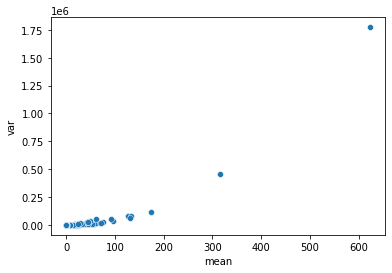

In [31]:
sns.scatterplot(data=df, x='mean', y='var')

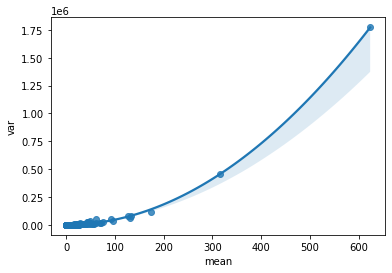

In [32]:
sns.regplot(data=df, x='mean', y='var', ci=90, order=2)

Распределение не похоже на отрицательное биномиальное, хорошо аппроксимируется полиномом второй степени

# Анализ wig-файла

In [3]:
# открываем файлы с .wig-трэками Ribo-Seq эксперимента кишечной палочки

!cat '02. RiboSeq_EColi_track_f.wig' > 'EColi_f.txt'
!cat '02. RiboSeq_EColi_track_r.wig' > 'EColi_r.txt'

ecoli_f = pd.DataFrame(pd.read_csv('EColi_f.txt', sep='\t', names=['pos', 'count'])).sort_index().iloc[1:]
ecoli_r = pd.DataFrame(pd.read_csv('EColi_r.txt', sep='\t', names=['pos', 'count'])).sort_index().iloc[1:]

for df in [ecoli_f, ecoli_r]:
  df[['pos', 'count']] = df[['pos', 'count']].astype(float)

ecoli_f

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pos,count
1,40.0,1.0
2,77.0,2.0
3,85.0,1.0
4,139.0,1.0
5,147.0,1.0
...,...,...
621391,4641624.0,3.0
621392,4641625.0,1.0
621393,4641626.0,1.0
621394,4641634.0,1.0


In [4]:
ecoli_r

,pos,count
1,585.0,1.0
2,1212.0,1.0
3,1292.0,1.0
4,3626.0,1.0
5,3979.0,1.0
...,...,...
643341,4641358.0,1.0
643342,4641368.0,1.0
643343,4641372.0,1.0
643344,4641459.0,1.0


In [5]:
# аннотация референсного генома

!gunzip 'GCF_000005845.2_ASM584v2_genomic.gtf.gz'
!cat 'GCF_000005845.2_ASM584v2_genomic.gtf' > 'EColi_ann.txt'

with open('EColi_ann.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('EColi_ann.txt', 'w') as fout:
    fout.writelines(data[3:])

ecoli_ann = pd.DataFrame(pd.read_csv('EColi_ann.txt', sep='\t', names=[i for i in range(9)]))

ecoli_ann

,0,1,2,3,4,5,6,7,8
0,NC_000913.3,RefSeq,gene,190.0,255.0,.,+,.,"gene_id ""b0001""; transcript_id """"; db_xref ""AS..."
1,NC_000913.3,RefSeq,CDS,190.0,252.0,.,+,0,"gene_id ""b0001""; transcript_id ""gnl|b0001|mrna..."
2,NC_000913.3,RefSeq,start_codon,190.0,192.0,.,+,0,"gene_id ""b0001""; transcript_id ""gnl|b0001|mrna..."
3,NC_000913.3,RefSeq,stop_codon,253.0,255.0,.,+,0,"gene_id ""b0001""; transcript_id ""gnl|b0001|mrna..."
4,NC_000913.3,RefSeq,gene,337.0,2799.0,.,+,.,"gene_id ""b0002""; transcript_id """"; db_xref ""AS..."
...,...,...,...,...,...,...,...,...,...
18016,NC_000913.3,RefSeq,gene,4640942.0,4641628.0,.,+,.,"gene_id ""b4403""; transcript_id """"; db_xref ""AS..."
18017,NC_000913.3,RefSeq,CDS,4640942.0,4641625.0,.,+,0,"gene_id ""b4403""; transcript_id ""gnl|b4403|mrna..."
18018,NC_000913.3,RefSeq,start_codon,4640942.0,4640944.0,.,+,0,"gene_id ""b4403""; transcript_id ""gnl|b4403|mrna..."
18019,NC_000913.3,RefSeq,stop_codon,4641626.0,4641628.0,.,+,0,"gene_id ""b4403""; transcript_id ""gnl|b4403|mrna..."


# 2.1 
Присутствует ли в покрытии генома неравномерность?
Рассмотрите неравномерность покрытия на примере любого выбранного вами
гена. Что вы можете сказать про эту неравномерность? Присутствует ли там
периодичность в три нуклеотида? А если взять среднее по большому
количеству генов (взяв за точку отсчёта старт-кодон)? Выводы
проиллюстрируйте графиками.

### На примере гена gene_id "b0002" (fused aspartate kinase/homoserine dehydrogenase 1)

In [6]:
# ген gene_id "b0002" занимает позиции с 337.0	по 2799.0	

b2_f = ecoli_f.loc[(ecoli_f['pos']>=337)&(ecoli_f['pos']<=2799)]
b2_f

,pos,count
111,337.0,40.0
112,338.0,34.0
113,339.0,12.0
114,340.0,7.0
115,341.0,17.0
...,...,...
2016,2794.0,441.0
2017,2795.0,22.0
2018,2796.0,14.0
2019,2797.0,3.0


In [7]:
b2_r = ecoli_r.loc[(ecoli_r['pos']>=337)&(ecoli_r['pos']<=2799)]
b2_r # тут оказалось очень мало ридов, поэтому обратная цепочка не учтена в последующем анализе для этого гена 

,pos,count
1,585.0,1.0
2,1212.0,1.0
3,1292.0,1.0


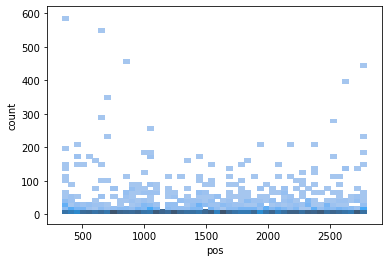

In [8]:
sns.histplot(data=b2_f, x='pos', y='count', bins=50)

In [9]:
# периодичность в три нуклеотида?

b2_f_1 = b2_f.iloc[::3, :]
b2_f_2 = b2_f.iloc[1::3, :]
b2_f_3 = b2_f.iloc[2::3, :]

sum1 = b2_f_1['count'].sum()
sum2 = b2_f_2['count'].sum()
sum3 = b2_f_3['count'].sum()

print(sum1, sum2, sum3)

12845.0 9969.0 11484.0


Наиболее высокие количества прочтений встречаются в позициях в начале и в конце гена gene_id "b0002", однако в остальном для него не заметны ни выраженная неравномерность покрытия, ни периодичность в три нуклеотида

### Среднее по большому количеству генов

In [55]:
start_codons = list(ecoli_ann.loc[ecoli_ann[2]=='start_codon', 3].values)
stop_codons = list(ecoli_ann.loc[ecoli_ann[2]=='stop_codon', 4].values)

genes_n_counts = pd.DataFrame({'gene':[i for i in range(1, len(start_codons)+1)],
                               'start':start_codons,
                               'stop':stop_codons}).set_index('gene')
genes_n_counts['length'] = abs(genes_n_counts['stop']-genes_n_counts['start'])

counts_copy = genes_n_counts # сохраним таблицу

genes_n_counts.head()

,start,stop,length
gene,,,
1,190.0,255.0,65.0
2,337.0,2799.0,2462.0
3,2801.0,3733.0,932.0
4,3734.0,5020.0,1286.0
5,5234.0,5530.0,296.0


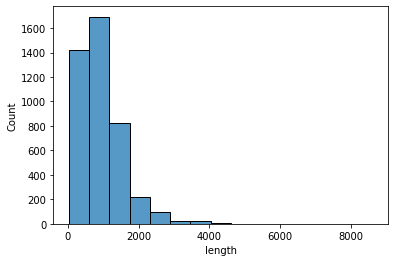

In [56]:
sns.histplot(data=genes_n_counts, x='length', bins=15) # выберем какой длины гены будем рассматривать

In [57]:
# возьмем гены с длиной около 1000 нуклеотидов
genes_n_counts = genes_n_counts.loc[(genes_n_counts['length']>995)&(genes_n_counts['length']<1005)]

print('таких генов', genes_n_counts.shape[0])

таких генов 20


In [58]:
for i in range(1, 1006): # готовим пустую таблицу
  genes_n_counts[i] = [0 for i in range(genes_n_counts.shape[0])]

genes_n_counts.head()

<ipython-input-58-77e97537e3c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes_n_counts[i] = [0 for i in range(genes_n_counts.shape[0])]
<ipython-input-58-77e97537e3c5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  genes_n_counts[i] = [0 for i in range(genes_n_counts.shape[0])]


,start,stop,length,1,2,3,4,5,6,7,...,996,997,998,999,1000,1001,1002,1003,1004,1005
gene,,,,,,,,,,,,,,,,,,,,,
81,88028.0,89032.0,1004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,290303.0,289303.0,1000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,622187.0,621187.0,1000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,909292.0,908295.0,997.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1072,1155762.0,1156766.0,1004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
for pos in list(ecoli_f['pos'].values): # заполняем таблицу для генов на прямой цепочке
  try:
    start = float(genes_n_counts.loc[(genes_n_counts['start']<=pos)&(genes_n_counts['stop']>=pos), 'start'].values)
  except TypeError:
    continue
  genes_n_counts.loc[genes_n_counts['start']==start, pos-start+1] = float(ecoli_f.loc[ecoli_f['pos']==pos, 'count'].values)

genes_n_counts

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,start,stop,length,1,2,3,4,5,6,7,...,996,997,998,999,1000,1001,1002,1003,1004,1005
gene,,,,,,,,,,,,,,,,,,,,,
81,88028.0,89032.0,1004.0,0,1,0,1,0,1,0,...,3,1,16,24,0,0,0,0,0,0
266,290303.0,289303.0,1000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,622187.0,621187.0,1000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,909292.0,908295.0,997.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1072,1155762.0,1156766.0,1004.0,13,44,22,17,0,0,3,...,0,0,0,5,0,0,10,1,0,0
1224,1305764.0,1306768.0,1004.0,3,2,0,3,3,1,11,...,6,1,1,0,2,4,3,5,6,3
1615,1702233.0,1703234.0,1001.0,1,7,6,27,2,1,0,...,0,0,2,0,8,7,3,0,0,0
1671,1758723.0,1757723.0,1000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1938,2020087.0,2021091.0,1004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
for pos in list(ecoli_r['pos'].values): # заполняем таблицу для генов на обратной цепочке
  try:
    stop = float(genes_n_counts.loc[(genes_n_counts['start']>=pos)&(genes_n_counts['stop']<=pos), 'stop'].values)
    genes_n_counts.loc[genes_n_counts['stop']==stop, pos-stop+1] = float(ecoli_r.loc[ecoli_r['pos']==pos, 'count'].values)
  except TypeError:
    continue

genes_n_counts

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,start,stop,length,1,2,3,4,5,6,7,...,996,997,998,999,1000,1001,1002,1003,1004,1005
gene,,,,,,,,,,,,,,,,,,,,,
81,88028.0,89032.0,1004.0,0,1,0,1,0,1,0,...,3,1,16,24,0,0,0,0,0,0
266,290303.0,289303.0,1000.0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,622187.0,621187.0,1000.0,2,1,0,13,0,5,1,...,1,1,2,0,2,0,0,0,0,0
846,909292.0,908295.0,997.0,0,0,3,0,0,1,1,...,1,15,2,0,0,0,0,0,0,0
1072,1155762.0,1156766.0,1004.0,13,44,22,17,0,0,3,...,0,0,0,5,0,0,10,1,0,0
1224,1305764.0,1306768.0,1004.0,3,2,0,3,3,1,11,...,6,1,1,0,2,4,3,5,6,3
1615,1702233.0,1703234.0,1001.0,1,7,6,27,2,1,0,...,0,0,2,0,8,7,3,0,0,0
1671,1758723.0,1757723.0,1000.0,0,1,26,8,0,0,0,...,1,0,2,0,2,2,0,0,0,0
1938,2020087.0,2021091.0,1004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
genes_n_counts = genes_n_counts.T # подготавливаем таблицу для графика
genes_n_counts['sum'] = genes_n_counts.sum(axis=1)
genes_n_counts.drop(index = ['start', 'stop', 'length'], inplace=True)
genes_n_counts['pos'] = genes_n_counts.index

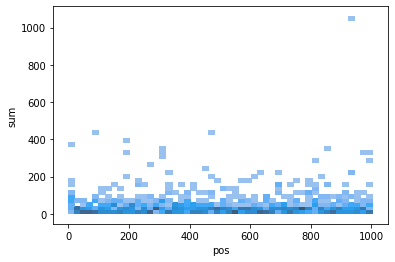

In [62]:
sns.histplot(genes_n_counts, x='pos', y='sum', bins=50)

In [63]:
# периодичность в три нуклеотида?

sum_list = list(genes_n_counts['sum'])

sum1 = sum(sum_list[::3])
sum2 = sum(sum_list[1::3])
sum3 = sum(sum_list[2::3])

print(sum1, sum2, sum3)

14549.0 16088.0 17276.0


Для рассмотренных 20 генов по сравнению с геном gene_id "b0002" неравномерность покрытия стала чуть менее заметной 

# 2.2
Рассчитайте значения RPKM и TPM для каждого гена. В чём
разница между RPKM и TPM?

### RPKM - reads per kilobase of transcript per million reads mapped

RPKM = (number of reads mapped to gene * 10^3 * 10^6) / (total number of mapped reads * gene length in bp)

In [64]:
counts = counts_copy

# number of reads mapped to gene
reads_per_gene=[]

for pos in list(ecoli_f['pos'].values): # прямая цепочка
  try:
    gene = int(counts.loc[(counts['start']<=pos)&(counts['stop']>=pos)].index[0])-1
  except IndexError:
    continue
  try:
    reads_per_gene[gene] += float(ecoli_f.loc[ecoli_f['pos']==pos, 'count'].values)
  except IndexError:
    reads_per_gene.append(float(ecoli_f.loc[ecoli_f['pos']==pos, 'count'].values))

for pos in list(ecoli_r['pos'].values): # обратная цепочка
  try:
    gene = int(counts.loc[(counts['start']>=pos)&(counts['stop']<=pos)].index[0])-1
  except IndexError:
    continue
  try:
    reads_per_gene[gene] += float(ecoli_r.loc[ecoli_r['pos']==pos, 'count'].values)
  except IndexError:
    reads_per_gene.append(float(ecoli_r.loc[ecoli_r['pos']==pos, 'count'].values))

counts['reads_per_gene'] = reads_per_gene
counts

,start,stop,length,reads_per_gene
gene,,,,
1,190.0,255.0,65.0,811.0
2,337.0,2799.0,2462.0,34298.0
3,2801.0,3733.0,932.0,6705.0
4,3734.0,5020.0,1286.0,19613.0
5,5234.0,5530.0,296.0,121.0
...,...,...,...,...
4311,4638178.0,4639530.0,1352.0,19.0
4312,4640304.0,4639592.0,712.0,11098.0
4313,4640402.0,4640542.0,140.0,1.0


In [65]:
total_reads = counts['reads_per_gene'].sum()

counts['RPKM'] = (counts['reads_per_gene'] * 10**3 * 10**6) / (total_reads * counts['length'])
counts

,start,stop,length,reads_per_gene,RPKM
gene,,,,,
1,190.0,255.0,65.0,811.0,518.624374
2,337.0,2799.0,2462.0,34298.0,579.063476
3,2801.0,3733.0,932.0,6705.0,299.039319
4,3734.0,5020.0,1286.0,19613.0,633.940482
5,5234.0,5530.0,296.0,121.0,16.991788
...,...,...,...,...,...
4311,4638178.0,4639530.0,1352.0,19.0,0.584147
4312,4640304.0,4639592.0,712.0,11098.0,647.903241
4313,4640402.0,4640542.0,140.0,1.0,0.296905


### TPM - transcripts per million

TPM = A * (1/sum(A)) * 10^6, где A = (total reads mapped to gene * 10^3) / gene length in bp

In [66]:
counts['A'] = (counts['reads_per_gene'] * 10**3) / counts['length']
sum_A = counts['A'].sum()
counts['TPM'] = counts['A'] * (1/sum_A) * 10**6
counts

,start,stop,length,reads_per_gene,RPKM,A,TPM
gene,,,,,,,
1,190.0,255.0,65.0,811.0,518.624374,12476.923077,311.415265
2,337.0,2799.0,2462.0,34298.0,579.063476,13930.950447,347.706770
3,2801.0,3733.0,932.0,6705.0,299.039319,7194.206009,179.562345
4,3734.0,5020.0,1286.0,19613.0,633.940482,15251.166407,380.658436
5,5234.0,5530.0,296.0,121.0,16.991788,408.783784,10.202957
...,...,...,...,...,...,...,...
4311,4638178.0,4639530.0,1352.0,19.0,0.584147,14.053254,0.350759
4312,4640304.0,4639592.0,712.0,11098.0,647.903241,15587.078652,389.042570
4313,4640402.0,4640542.0,140.0,1.0,0.296905,7.142857,0.178281


# 2.3
Проанализируйте значения RPKM для генов из оперона ATP.
Укажите геномные координаты оперона, а также то, какие гены в него входят.
Есть ли разница между RPKM у различных генов, присутствующих в опероне?
Как вы можете объяснить эту разницу с биологической точки зрения? Как вы
думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?

In [67]:
atp_starts=[]
atp_genes=[]

for index, row in ecoli_ann.loc[ecoli_ann[2]=='start_codon'].iterrows():
  if 'gene "atp' in str(row[8]):
    atp_starts.append(row[3])
    gene_infos = str(row[8]).split('; ')
    for gene in gene_infos:
      if 'product' in gene:
        atp_genes.append(gene)

In [74]:
atp_counts = counts.loc[(counts['start']>=atp_starts[0])&(counts['start']<=atp_starts[-1])]
atp_counts['gene'] = atp_genes
atp_counts.sort_values('RPKM')

# геномные координаты оперона: с 3915555 по 3922438

<ipython-input-74-1993d77dff5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atp_counts['gene'] = atp_genes


,start,stop,length,reads_per_gene,RPKM,A,TPM,gene
gene,,,,,,,,
3688,3922438.0,3922062.0,376.0,494.0,54.611553,1313.829787,32.792272,"product ""ATP synthase accessory factor AtpI"""
3682,3918263.0,3917404.0,859.0,12586.0,609.031828,14651.920838,365.701686,"product ""ATP synthase F1 complex subunit gamma"""
3684,3920401.0,3919872.0,529.0,9355.0,735.078204,17684.310019,441.387997,"product ""ATP synthase F1 complex subunit delta"""
3685,3920886.0,3920420.0,466.0,11129.0,992.694582,23881.974249,596.077357,"product ""ATP synthase Fo complex subunit b"""
3680,3915970.0,3915555.0,415.0,11541.0,1155.954580,27809.638554,694.109108,"product ""ATP synthase F1 complex subunit epsilon"""
3687,3922049.0,3921238.0,811.0,22853.0,1171.299050,28178.791615,703.322910,"product ""ATP synthase Fo complex subunit a"""
3683,3919855.0,3918318.0,1537.0,73113.0,1977.270845,47568.640208,1187.279955,"product ""ATP synthase F1 complex subunit alpha"""
3681,3917373.0,3915995.0,1378.0,82243.0,2480.819415,59682.873730,1489.642743,"product ""ATP synthase F1 complex subunit beta"""
3686,3921187.0,3920952.0,235.0,69775.0,12341.768861,296914.893617,7410.787866,"product ""ATP synthase Fo complex subunit c"""


Есть значительная разница в RPKM между разными генами оперона ATP. Вспомогательный фактор AtpI транслируется меньше, чем субъединицы самого АТФ-синтазного комплекса, из которых наиболее транслируемая - субъединица _с_ F0-части АТФ-синтазы. Можно предположить, что трансляция пропорциональна количеству субъединиц в ферментативном комплексе: например, в каждом комплексе находится 10-15 субъединиц _с_ и 3 beta-субъединицы F1, что соответствует полученным значениям RPKM 12341 для _c_ и 2481 для beta

# 1.4
Найдите дифференциально экспрессированные гены по
RNA-Seq между нормой и опухолью. Для этого можете использовать DESeq2
или edgeR (для DESeq есть обёртка на Python). Постройте volcano plot. То же
самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты
дифференциальной экспрессии? Какие гены оказались значимо различны по
экспрессии в одном случае, а какие — в другом? Проведите похожий анализ,
только с поиском генов с разницей в эффективности трансляции (~ method +
condition + method:condition). Что вы скажете о наборе генов, который
вы получили этим методом? Выводы подкрепите графиками.


In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 8.0 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310204 sha256=4e9e909aec398ad4c58ae33358721bcb13e32dcfd5526c996f132389b381279e
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c bioconda bioconductor-deseq2

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconductor-deseq2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    argcomplete-2.0.0          |     pyhd8ed1ab_0          34 KB  conda-forge
    binutils_impl_linux-64-2.39|       he00db2b_1         4.7 MB  conda-forge
    bioconductor-annotate-1.76.0|

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

DESeq2 = importr("DESeq2")

### Дифференциальная экспрессия (RNA-Seq)

In [ ]:
import pandas as pd

counts = pd.read_csv("01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")

genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)

columns = list(counts.columns.values)
for column in columns:
  if 'RPF' in column:
    counts.drop(column, axis=1, inplace=True)

counts

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
0,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857.0
1,0,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0
2,88,187,66,201,80,16,54,165,57,174,61,155,104,114,92,170,60,244,56,83.0
3,60,106,70,156,77,67,78,68,97,128,76,185,114,74,127,176,55,261,68,176.0
4,18,70,4,63,60,4,17,112,28,14,8,118,25,98,124,437,34,201,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,1,39,0,5,1,25,0,11,3,26,0,1,2,8,0,31,0,62,1,17.0
18941,27,5,20,51,12,49,16,47,43,132,23,46,50,102,81,52,9,42,3,40.0
18942,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
18943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
# Design matrix
design = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in counts.columns],
}, index=counts.columns)

design.head()

,condition
LC001-normal-RNA,normal
LC001-tumor-RNA,tumor
LC033-normal-RNA,normal
LC033-tumor-RNA,tumor
LC034-normal-RNA,normal


In [ ]:
# DESeq2
with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(counts.astype(int))
    colData = pandas2ri.py2rpy(design)
    
dds = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~ condition"),
)

dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 1242 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [ ]:
# Getting the results
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results = to_dataframe(DESeq2.results(dds))

with localconverter(pandas2ri.converter):
    dds_results = ro.conversion.rpy2py(dds_results)
    dds_results.index = genes

dds_results.sort_values('padj').head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CLEC4G,187.902511,-6.224294,0.471543,-13.199842,8.791966e-40,1.464478e-35
OIT3,207.433311,-4.190143,0.372389,-11.252055,2.262593e-29,1.884400e-25
AVPR1A,216.785200,-4.836026,0.444956,-10.868551,1.627649e-27,8.917125e-24
INS-IGF2,517.466267,-5.941896,0.547969,-10.843493,2.141352e-27,8.917125e-24
FCN2,154.170314,-5.700993,0.527201,-10.813696,2.964778e-27,9.876861e-24


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log$_{10}$FDR')

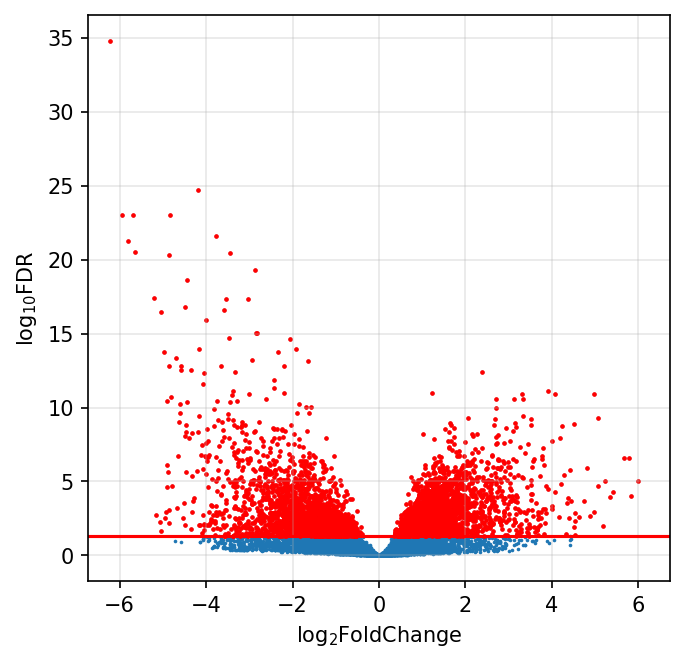

In [ ]:
# Volcano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(dds_results.log2FoldChange), (max(dds_results.log2FoldChange))) + 0.5

sns.scatterplot(
    x=dds_results.log2FoldChange,
    y=-np.log10(dds_results.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=dds_results[dds_results.padj < p_tr].log2FoldChange,
    y=-np.log10(dds_results[dds_results.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")

### Дифференциальная трансляция (Ribo-Seq)

In [ ]:
counts = pd.read_csv("01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")

genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)

for column in columns:
  if 'RNA' in column:
    counts.drop(column, axis=1, inplace=True)

counts

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
2,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
3,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
4,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
18941,0,4,0,32,0,6,1,37,4,15,0,7,0,0,0,0,1,0,0,10
18942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18943,0,9,0,0,0,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Design matrix
design = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in counts.columns],
}, index=counts.columns)

design.head()

,condition
LC001-normal-RPF,normal
LC001-tumor-RPF,tumor
LC033-normal-RPF,normal
LC033-tumor-RPF,tumor
LC034-normal-RPF,normal


In [ ]:
# DESeq2
with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(counts.astype(int))
    colData = pandas2ri.py2rpy(design)
    
dds = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~ condition"),
)

dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 888 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [ ]:
# Getting the results
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results = to_dataframe(DESeq2.results(dds))

with localconverter(pandas2ri.converter):
    dds_results = ro.conversion.rpy2py(dds_results)
    dds_results.index = genes

dds_results.sort_values('padj').head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CETP,234.706196,-3.661168,0.328144,-11.157205,6.603531e-29,9.219850e-25
OIT3,378.527099,-4.123941,0.384101,-10.736618,6.850819e-27,4.782557e-23
TIMD4,115.823325,-4.410428,0.424721,-10.384291,2.923339e-25,1.360522e-21
ADGRA3,351.272069,-3.789142,0.368147,-10.292473,7.619383e-25,2.659546e-21
CLEC4M,60.025648,-6.019149,0.589470,-10.211112,1.768264e-24,4.937702e-21


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log$_{10}$FDR')

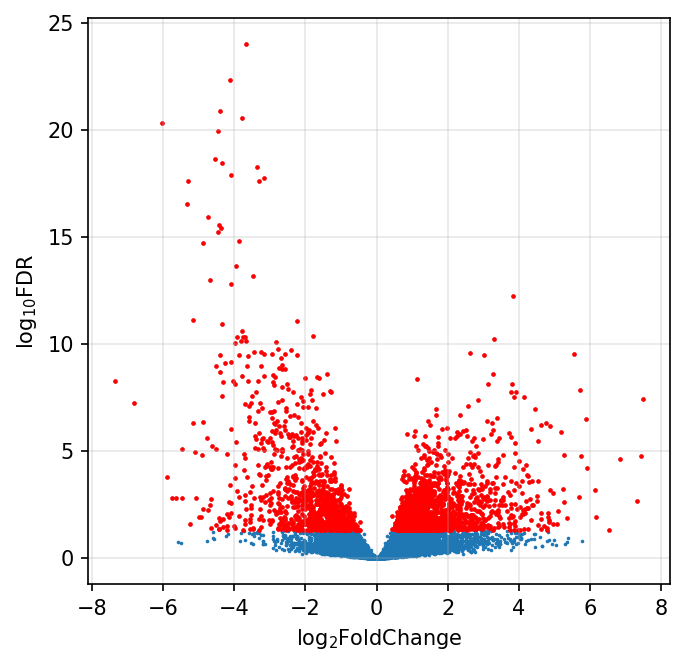

In [ ]:
# Volcano
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(dds_results.log2FoldChange), (max(dds_results.log2FoldChange))) + 0.5

sns.scatterplot(
    x=dds_results.log2FoldChange,
    y=-np.log10(dds_results.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=dds_results[dds_results.padj < p_tr].log2FoldChange,
    y=-np.log10(dds_results[dds_results.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")

### Поиск генов с разницей в эффективности трансляции 

In [ ]:
counts = pd.read_csv("01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)

counts

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
0,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
2,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
3,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
4,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17.0
18941,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40.0
18942,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,0,9,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
# Design matrix
design = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in counts.columns],
    "experiment": [sample_name.split("-")[2] for sample_name in counts.columns],
}, index=counts.columns)

design.head()

,condition,experiment
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC001-normal-RNA,normal,RNA
LC001-tumor-RNA,tumor,RNA
LC033-normal-RPF,normal,RPF


In [ ]:
# DESeq2
with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(counts.astype(int))
    colData = pandas2ri.py2rpy(design)
    
dds = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~ condition + experiment + experiment:condition"),
)

dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [ ]:
# Getting the results
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results = to_dataframe(DESeq2.results(dds, name="conditiontumor.experimentRPF"))

with localconverter(pandas2ri.converter):
    dds_results = ro.conversion.rpy2py(dds_results)
    dds_results.index = genes
    
dds_results.sort_values('padj').head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
DMXL1,292.358919,-1.242948,0.250249,-4.966847,6.805028e-07,0.005695
UAP1,524.937253,-1.852040,0.372283,-4.974812,6.531085e-07,0.005695
DPP9,19998.727349,2.699844,0.557605,4.841855,1.286329e-06,0.007176
CDC25A,28.822459,3.896988,0.820834,4.747594,2.058507e-06,0.008613
KIAA1211L,9.758817,3.937915,0.884599,4.451639,8.521747e-06,0.028526


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log$_{10}$FDR')

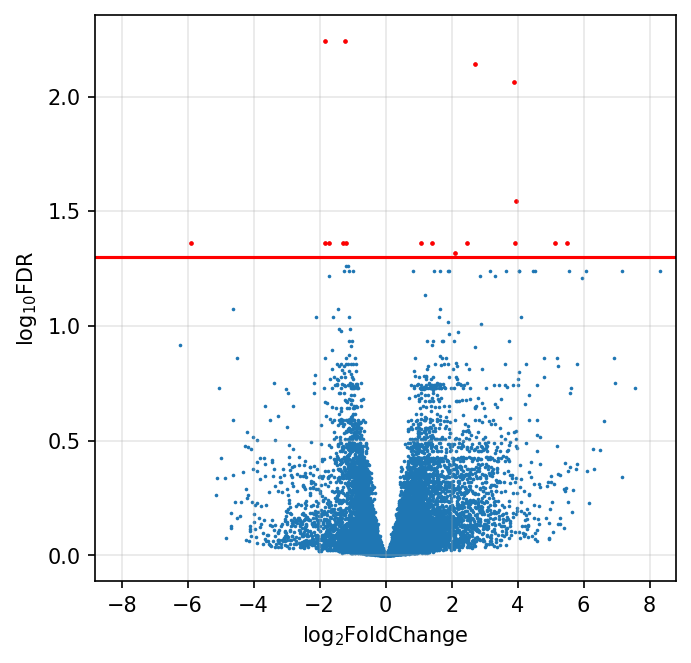

In [ ]:
# Volcano
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(dds_results.log2FoldChange), (max(dds_results.log2FoldChange))) + 0.5

sns.scatterplot(
    x=dds_results.log2FoldChange,
    y=-np.log10(dds_results.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=dds_results[dds_results.padj < p_tr].log2FoldChange,
    y=-np.log10(dds_results[dds_results.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")